### 문제정의
- 손 글씨 숫자 (0 ~ 9) 를 분류하는 모델을 만들어보자
- 이미지 데이터의 형태를 이해해보자 

### 데이터 수집

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('./data/digit_train.csv')
data.head()

# label : 정답 
# pixel 0 ~ 783 : 28 * 28 이미지 데이터

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [8]:
# 데이터 시각화 
# 이미지 데이터로 첫번째 행의 label 을 제외한 모든 컬럼을 가져오기 

img0=data.iloc[0,1:]
img0

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [9]:
img0.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
# 리스트 자료형을 28 * 28 의 2차원으로 변환 
img0_reshape=img0.values.reshape(28,28)

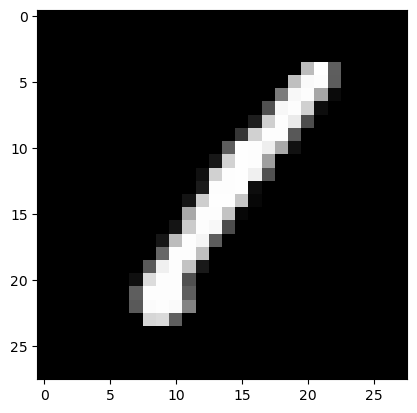

In [15]:
# 이미지 하나를 그려보기
plt.imshow(img0_reshape,cmap='gray')
plt.show() # 이미지 출력시 불필요한 문자출력 생략 

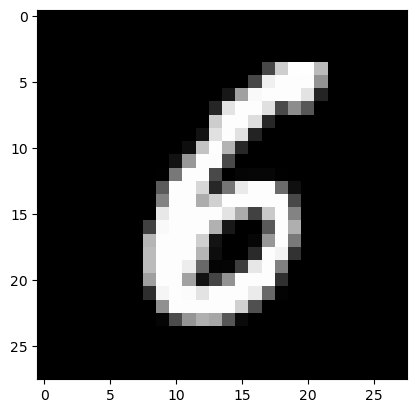

In [20]:
# 15000 번째 데이터 가져와서 시각화 해보기
plt.imshow(data.iloc[14999,1:].values.reshape(28,28),cmap='gray')
plt.show()

### 학습을 위한 데이터 분리 
- X, y
- 학습(7) : 테스트(3) : train_test.split
- random_state : 10 

In [53]:
# 1. 문제 : X, 정답 : y
X=data.iloc[:,1:]
y=data.iloc[:,0]

# 2. 학습(7) : 테스트(3) 으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# 분리된 데이터 확인 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400,)
(12600,)


### 모델 선택
- KNN
- Logistic Regression
- SVM

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 모델 생성
knn_model=KNeighborsClassifier()
logi_model=LogisticRegression()
svm_model=LinearSVC()

### 학습 

In [56]:
knn_model.fit(X_train,y_train)
logi_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [57]:
print('KNN : ', knn_model.score(X_test,y_test))
print('Logistic : ', logi_model.score(X_test,y_test))
print('SVM : ', svm_model.score(X_test,y_test))

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN :  0.9657936507936508
Logistic :  0.9156349206349207
SVM :  0.817936507936508


### 데이터 스케일링
- 이미지 데이터로 픽셸정보는 0 ~ 255 로 최소 / 최대가 고정되어 있음 
- MinMaxScaler 를 사용하여 0 ~ 1 사이의 값으로 모든 픽셸을 조정 
- 스케일링의 효과 확인하기
    - 학습(연산) 속도 개선
    - 값의 변화가 있는지 확인 
- 거리기반으로 예측하는 KNN 모델은 값의 변화가 없었음 
- KNN : 데이터가 많을수록 속도가 느려짐 => 모든 데이터에 대한 거리를 계산 

In [58]:
from sklearn.preprocessing import MinMaxScaler

# 모델 생성 
mscaler=MinMaxScaler() 

# 학습 
# 현재 데이터 분포의 최소 / 최대 값 확인
# 변환하는 기준값을 X_train 으로 추출 
mscaler.fit(X_train)

MinMaxScaler()

In [59]:
# 문제 데이터에 스케일링 적용
X_train_trans=mscaler.transform(X_train)
X_test_trans=mscaler.transform(X_test)

In [64]:
# 스케일링을 적용한 데이터로 다시 학습
knn_model.fit(X_train_trans,y_train)
logi_model.fit(X_train_trans,y_train)
svm_model.fit(X_train_trans,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [65]:
# 변화값 확인
print('KNN : ', knn_model.score(X_test_trans,y_test))
print('Logistic : ', logi_model.score(X_test_trans,y_test))
print('SVM : ', svm_model.score(X_test_trans,y_test))

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN :  0.9657936507936508
Logistic :  0.9181746031746032
SVM :  0.9073015873015873


In [66]:
# KNN :  0.9657936507936508
# Logistic :  0.9156349206349207
# SVM :  0.817936507936508

### 평가지표
- 회귀 : 오차를 기반으로 하는 평가지표 사용 (MSE, R2score)
- 분류 : 맞춘 개수를 기반으로 평가지표 사용
    1. 정확도 (Accuracy) : 전체 데이터 중에서 정확히 맞춘 비율 
    2. 재현율 (Recall) : 실제 양성중에서 정확히 맞춘 비율 
    3. 정밀도 (Precision) : 예측하는 양성중에서 정확히 맞춘 비율 
    4. F1-score : 정밀도와 재현율의 조화평균 
- SVM : 초평면을 기준으로 소프트 백터의 마진이 클수록 좋은 결정경계

In [67]:
# 오차 행렬
from sklearn.metrics import confusion_matrix

In [68]:
pre=logi_model.predict(X_test_trans)

In [69]:
# confusion_matrix (실제값, 예측값)
test_conf=confusion_matrix(y_test,pre)
test_conf

array([[1143,    0,    5,    4,    4,   11,   13,    1,    6,    1],
       [   0, 1384,    4,    7,    1,    1,    0,    2,   13,    1],
       [   3,   15, 1129,   24,   16,    9,   15,   12,   33,    4],
       [   6,    5,   30, 1209,    0,   42,    4,    9,   19,    7],
       [   2,    7,   11,    2, 1138,    0,   11,    2,    7,   38],
       [   9,    4,    9,   41,    6, 1005,   20,    4,   45,    6],
       [   6,    2,   11,    0,   10,   14, 1166,    3,    7,    0],
       [   5,    8,   14,    7,   12,    4,    2, 1237,    2,   39],
       [   7,   29,   17,   57,    6,   32,   14,    6, 1026,   23],
       [   5,    4,    5,   24,   39,    7,    0,   50,    9, 1132]],
      dtype=int64)

In [72]:
# 분류평가지표 4가지를 report 형식으로 확인 
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1188
           1       0.95      0.98      0.96      1413
           2       0.91      0.90      0.91      1260
           3       0.88      0.91      0.89      1331
           4       0.92      0.93      0.93      1218
           5       0.89      0.87      0.88      1149
           6       0.94      0.96      0.95      1219
           7       0.93      0.93      0.93      1330
           8       0.88      0.84      0.86      1217
           9       0.90      0.89      0.90      1275

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



- support : 데이터의 갯수
- accuracy : logi_model 의 예측성능은 92%, 각 숫자가 나올 확률은 다름 
- fi-score : 정밀도와 재현율을 고려한 수치, 수치가 높게 나왔다면 두 분류지표 (정밀도, 재현율)도 높음을 알 수 있음
- macro avg : 재현율, 정밀도, f1-score 을 구해서 각각 평균을 낸 값 
    분류모델이 각 클래스에 대해 얼마나 평균적으로 잘 설명하고 있는지 알고 싶을 때 사용하는 수치 
- weighted avg(가중평균) : 개별치(각 숫자) 각각의 중요도, 영향도(빈도) 등에 따라 가중치를 곱해서 구해지는 평균 